I'm looking at distribution of different label among each dataset.

In [85]:
import csv
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader
import pickle
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import normalize
from collections import OrderedDict

from matplotlib import pyplot as plt

In [86]:
# Network architecture

class MLP(nn.Module):
    def __init__(self, num_fin: int, num_classes: int):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(num_fin, num_classes)
        )

    def forward(self, x: torch.Tensor):
        return self.net(torch.flatten(x, 1))

In [87]:
PATH = '/work/cvcs2024/SLR_sentiment_enhanced/datasets/WLASL/WLASL/start_kit/gloss_list.csv'

label_to_name = dict()
with open(PATH, newline='\n') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        if row[0] == 'gloss ID':
            continue
        label_to_name[int(row[0])] = [
            str(row[1])]
        

em_list = ['neutral', 'happy', 'sad', 'surprise', 'fear', 'disgust', 'anger', 'contempt']

In [88]:
model = MLP(2008, 2000).to('cpu')

model.load_state_dict(torch.load('/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/Ensemble/Ensemble_NN/weights/Exp24100C.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

In [89]:
print(len(model.net[0].weight))
print(len(model.net[0].weight[0]))

print(len(model.net[0].bias))

2000
2008
2000


['mention', 'see', 'finance', 'robot', 'heap', 'from now on', 'accent', 'statistics', 'russia', 'bright']
[3.522315263748169, 3.0316944122314453, 2.9247331619262695, 2.908632278442383, 2.883373260498047, 2.808436870574951, 2.7998788356781006, 2.6579623222351074, 2.6264936923980713, 2.6256585121154785]
10
10


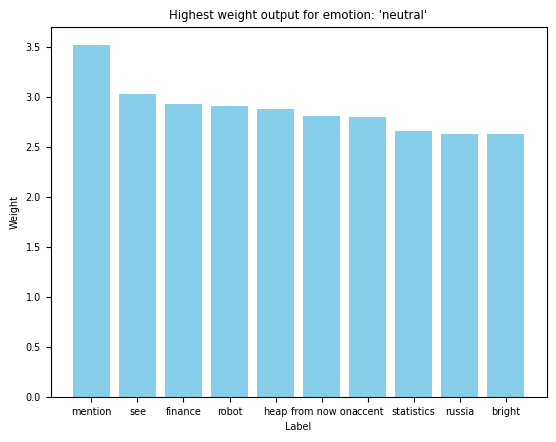

['complete', 'silly', 'april', 'great', 'excited', 'cherry', 'chocolate', 'hello', 'receive', 'alligator']
[4.024282932281494, 3.9730522632598877, 3.812262535095215, 3.3161394596099854, 3.2744500637054443, 3.240809440612793, 3.154348611831665, 3.131991386413574, 3.0773496627807617, 3.071622133255005]
10
10


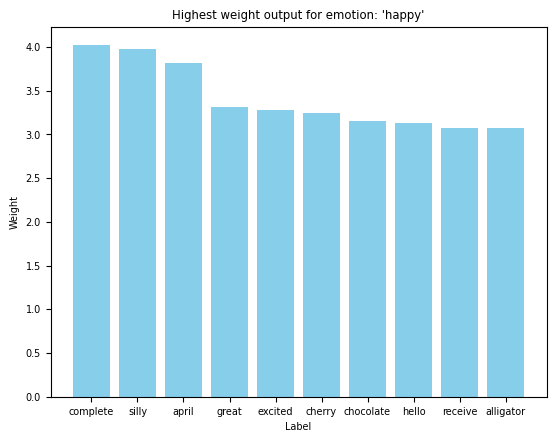

['proper', 'everyday', 'paragraph', 'detective', 'skip', 'pack', 'potential', 'circle', 'snow', 'society']
[3.8944754600524902, 3.875483274459839, 3.2935268878936768, 3.1824285984039307, 3.1193971633911133, 3.046569585800171, 2.98439359664917, 2.9407572746276855, 2.93218994140625, 2.8271424770355225]
10
10


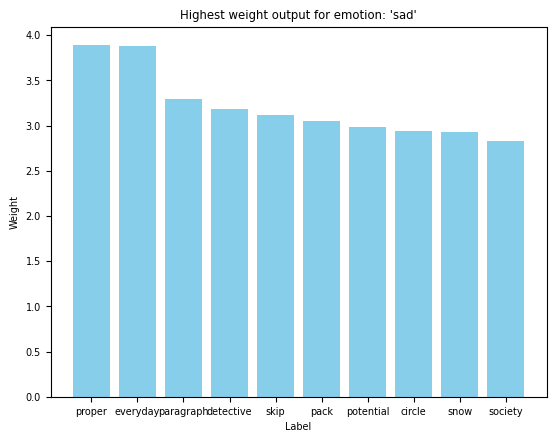

['street', 'hang up', 'winter', 'health', 'rich', 'o', 'workshop', 'sketch', 'electricity', 'professor']
[3.770623207092285, 3.753892183303833, 3.4224154949188232, 2.8832578659057617, 2.8773701190948486, 2.869760274887085, 2.763134479522705, 2.7471745014190674, 2.6376607418060303, 2.633587121963501]
10
10


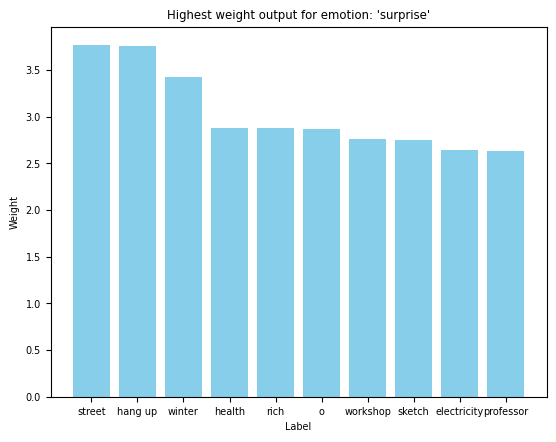

['rose', 'engagement', 'turn', 'comb', 'choose', 'spray', 'painter', 'polar bear', 'respect', 'skate']
[3.9077203273773193, 3.877375602722168, 3.8126609325408936, 3.5594379901885986, 3.2953686714172363, 3.2344703674316406, 3.1914069652557373, 3.178713321685791, 3.1699841022491455, 2.9818007946014404]
10
10


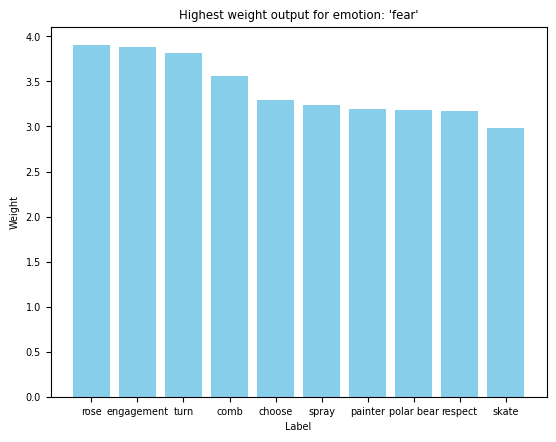

['far', 'disgust', 'dirty', 'maybe', 'tired', 'argue', 'curse', 'arrogant', 'depend', 'awful']
[3.71452260017395, 3.706991195678711, 3.6827828884124756, 3.6428301334381104, 3.539790391921997, 3.438438653945923, 3.330203056335449, 3.328685998916626, 3.308727264404297, 3.276533603668213]
10
10


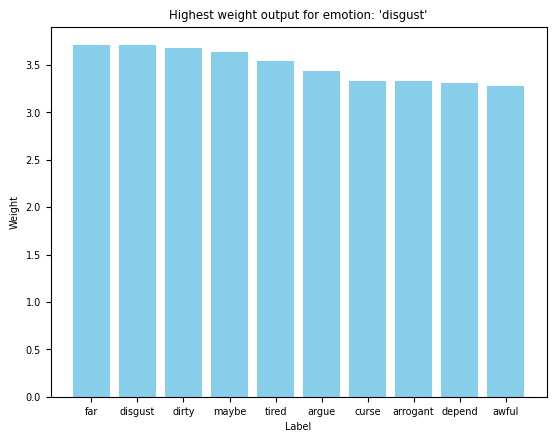

['interest', 'viewpoint', 'over', 'which', 'who', 'sue', 'similar', 'first', 'bad', 'audiologist']
[4.054910182952881, 3.9956188201904297, 3.723784923553467, 3.6779274940490723, 3.3422789573669434, 3.153323173522949, 2.9925155639648438, 2.947152614593506, 2.937842607498169, 2.8984034061431885]
10
10


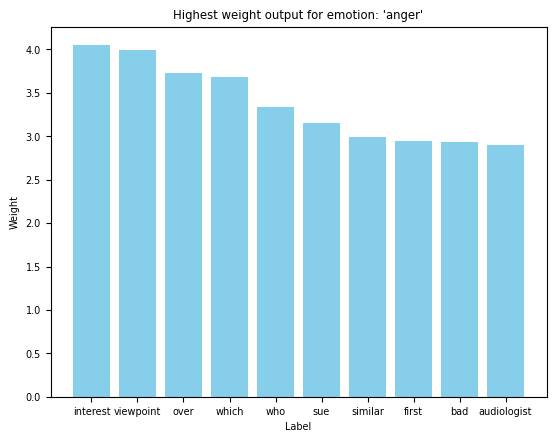

['refer', 'table', 'intersection', 'turtle', 'captain', 'tempt', 'operate', 'copy', 'economy', 'article']
[3.784823179244995, 3.22233510017395, 2.9798173904418945, 2.9183974266052246, 2.8375067710876465, 2.7362403869628906, 2.7307560443878174, 2.648711919784546, 2.6422817707061768, 2.597059488296509]
10
10


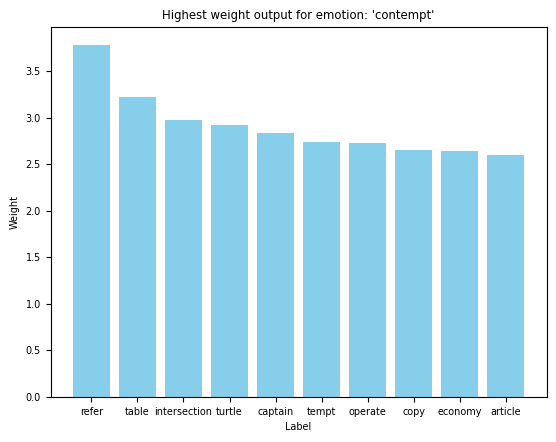

In [90]:
weight = model.net[0].weight    # 2000 * 2008
bias = model.net[0].bias        # 2000

for e in range(8):
    values = [w[e + 2000].detach().numpy() for w in weight]
    # print(type(values[0]))
    values = np.array(values)
    # print(values)
    top10 = values.argsort()[-10:]

    label_plot = list([str(label_to_name[v][0]) for v in top10])
    label_plot.reverse()
    values_plot = list([float(a) for a in np.sort(values)[-10:].tolist()])
    values_plot.reverse()
    print(label_plot)
    print(values_plot)
    print(len(label_plot))
    print(len(values_plot))
    plt.rcParams.update({'font.size': 7})
    plt.bar(label_plot, values_plot, color='skyblue')
    plt.xlabel('Label')
    plt.ylabel('Weight')
    plt.title(f'Highest weight output for emotion: \'{em_list[e]}\'')
    plt.show()
    